# Phys 349: Project Plant

## 1. Introduction

**Contributions**: Sam and Jordan wrote independent versions of the code, Wilfred merged and optimized the code. Wilfred wrote the initial proposal and interim report while Sam and Jordan reviewed and made edits.

We aim to study the Lindenmayer System (L-System) to create fractals using geometric shapes, develop realistic-looking organisms, and find new fractal patterns. The L-system is a formal language developed by biologist Aristid Lindenmayer that uses the alphabet and production rules to recursively expand a string. It was originally introduced to model plant cell growth, and developed into a formal language that can generate self-similar fractals. The purpose of this project is two-fold.
First, to simulate the creation of realistic vegetation. This is useful for procedural generation of images such as in video games or CGI effects. Second, to experiment with rules to generate new and interesting patterns. More information can be found at https://en.wikipedia.org/wiki/L-system.

To generate new patterns we use probability, statistics or Fourier Analysis applied to known, realistic-looking plants. We search for patterns, then write an algorithm to generate new realistic plants by stochastically altering the known plant's rules. The randomly generated structures are automatically developed then go through a process of elimination if they do not meet the criteria developed through quantitative analysis of known plants. 
Our hypothesis is the following: there is structural symmetry in realistic-looking plants that can be found using statistics, probability, or Fourier Analysis, which can help us find new rules for plant simulation. 

## 2. Algorithm Review and Comparison

To visualize the system, a python package called Turtle is used. Turtle allows the user to create movies, and in our case, drawing of the L-Systems. Here, we will import the packages we need and show the merged code. 

The code uses a set of variables, constants (if any), an initial starting point (axiom) and a set of rules to recursively create the intended pattern. The variables will then be drawn and turned into shapes that we can analyze.
The parameters of the program are defined as such:
- variables: set of symbols that can be replaced by the rules
- constants: variables that are unaffected by rules applied
- axiom: initial starting point of the structure
- rules: rules that the recursion must follow

Both independently written versions of the code used the same algorithm and were combined into an Object-Oriented version that pulls elements from both. The user is able to choose what kind of L-System to draw using the LSystem class and then iterate as desired. The DrawFractal class inherits from the LSystem class and has methods that can draw fractals such as: 
- Koch Curve
- Sierpinski Triangle
- Dragon Curve
- Binary Fractal Tree
- Fractal plant

Both versions of the code differed only in coding preference. For instance, one used lists and included parameters as arguments to a class, and the other used dictionaries, and hard-coded the parameters into the class. Since the objective is to expand this to numerous case studies of rules, variables, axioms and such; we will use the arguments to input the parameters moving forward. We will also use dictionaries instead of lists as that allows for quicker access to the rules, instead of having to iterate through them each time. Below is a table with each fractal type and their corresponding parameters.


<table>
    <caption style="caption-side:bottom">Table 1: Parameters of Various Test Studies</caption>
    <tr>
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">Fractal Type</th>
        <th scope="col" style="text-align: left;">Axiom</th>
        <th scope="col" style="text-align: left;">Constants</th>
        <th scope="col" style="text-align: left;">Variables</th>
        <th scope="col" style="text-align: left;">Rules</th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">Koch Curve</th>
        <th scope="col" style="text-align: left;"> F </th>
        <th scope="col" style="text-align: left;"> +,  -</th>
        <th scope="col" style="text-align: left;"> F </th>
        <th scope="col" style="text-align: left;"> F &rarr;  F+F-F-F+F </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">Sierpinski Triangle</th>
        <th scope="col" style="text-align: left;"> F-G-G </th>
        <th scope="col" style="text-align: left;"> +,  - </th>
        <th scope="col" style="text-align: left;"> F,  G </th>
        <th scope="col" style="text-align: left;"> F &rarr; F-G+F+G-F,  G &rarr; GG </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">Binary Fractal Tree</th>
        <th scope="col" style="text-align: left;"> 0 </th>
        <th scope="col" style="text-align: left;"> [,  ] </th>
        <th scope="col" style="text-align: left;"> 0,  1 </th>
        <th scope="col" style="text-align: left;"> 0 &rarr; 1[0]0,  1 &rarr; 11 </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">Dragon Curve</th>
        <th scope="col" style="text-align: left;"> F </th>
        <th scope="col" style="text-align: left;"> +,  -  </th>
        <th scope="col" style="text-align: left;"> F,  G </th>
        <th scope="col" style="text-align: left;"> F &rarr; F+G,  G &rarr; F-G </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">Fractal Plant</th>
        <th scope="col" style="text-align: left;"> X </th>
        <th scope="col" style="text-align: left;"> +,  -,  [,  ] </th>
        <th scope="col" style="text-align: left;"> X,  F </th>
        <th scope="col" style="text-align: left;"> X &rarr; F+[[X]-X]-F[-FX]+X,  F &rarr; FF </th>
    </tr>
</table>

In [5]:
# Import Section
import numpy as np
import turtle
from sys import platform
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.core.display import HTML

In [16]:
class LSystem(object):
    def __init__(self, A='F', C=['+', '-'], V=['F'], R={'F': [['F+F-F-F+F', 1.]]}, N=1):
        '''
        This function uses a given set of variables, constants, rules and an axiom to iterate lines which builds up on the previous one.

        Args:
            V:          string which contains all the variables. e.g. 'AB' for variables 'A' and 'B'
            C:          string which contains all the constants. e.g. '+-' for constants '+' and '-'
            A:              string which contains the initial state. e.g. 'A+B-AA'.
                                    Can only contain variables and constants characters.
            R:              list of strings which contains the rules for each constants in the order the constants
                                    are given, e.g. ['AA-', 'AB+-A'] for rule 'A' --> 'AA-' and rule 'B' --> 'AB+-A'.
                                    Note that there need to be as many rules as variables.
                                    Can only contain variables and constants characters.
        output:
            None
        '''
        
        self.variables = V #separate the variables into list of one character strings
        self.const = C #separate the constants into list of one character strings
        self.axiom = A #separate the axiom into list of one character strings
        self.rules = R 
        self.current = self.axiom
        self.N = N # Number of growth iterations
        self.bmax = self.count_brackets() # Dict of max number of branching for each possible rule
        self.prob_arrays = self.create_prob_arrays()
        # self.determine_rule(s='F', b=1)
        print('Fractal Initiated!')
    
        
    def create_prob_arrays(self):
        prob_arrays = self.rules.copy()
        
        for s in self.rules.keys():
            possible_rules = self.rules[s]            
            pstart = np.zeros(len(possible_rules))
            pstart[0] = 1

            plist = np.array(possible_rules)[:, 1].astype(float)
            
            if self.bmax < 0: # < 1 before
                ps = plist
            else:
                ps = np.linspace(pstart, plist, max(self.bmax, 1) * self.N) # or brackets[s] * N + 1?
            
            prob_arrays[s] = ps
        
        return prob_arrays
    

    def determine_rule(self, s, b):

        '''
        Determine which stochastic rule is selected for the next generation
        '''
        
        possible_rules = self.rules[s]
        prob_arrays = self.prob_arrays[s]
        #brackets = self.brackets[s]
        
        # print('possible_rules', possible_rules)
        # print('prob_arrays', prob_arrays)
        # print('brackets', brackets)
        
        if b > len(prob_arrays) - 1:
            print('b > length of array!')
        
        select = max(b, len(prob_arrays)-1) # To ensure it doesn't select an index greater than the length
        curr_probs = prob_arrays[select]
        
        if len(possible_rules) == -1: # == 1 before I changed
            rule = possible_rules[0][0]
            
        else:
            p_tot = 0.
            rand = np.random.uniform(0, 1)
            
            for i, p in enumerate(curr_probs):
                p_tot += float(p)
                # print(p_tot)
                if p_tot > rand:
                    rule = possible_rules[i][0]
                    # print('i', i, 'possible_rules[i][0]', rule)
                    break
        
        
        return rule   
        
    def count_brackets(self):
        b = 0
        bmax = 0
        brackets = self.rules.copy()
        listof_bmax = []
        for s in self.rules.keys():
            possible_rules = self.rules[s]

            bmax=0
            for r in possible_rules:
                b=0
                for string in r[0]:
                    if string == '[':
                        b += 1
                    if string == ']':
                        b -= 1
                    if b > bmax:
                        bmax = b
            brackets[s] = bmax
            listof_bmax.append(bmax)

        return max(listof_bmax)

    def grow_my_child(self):
        '''
        Grow the fractal by n iterations (starts at 1)
        Args:
            N: Number of iterations to grow the fractal
        Returns:
            LSystem string after N iterations
        '''

        for i in range(self.N):
            next_plant = ''
            b = 0
            for s in self.current:
                # Since we have multiple options with various probabilities, need to
                # determine what the options are and randomly select a rule according
                # to the probabilities.
                
                if s == '[':
                    b += 1
                elif s == ']':
                    b -= 1
                    
                if s in self.rules.keys():                                        
                    # determine which rule to use stochastically
                    s_new = self.determine_rule(s, b=b)
                    # print('s_new', s_new)

                    # if it is in the constants list, then add it to the new plant
                elif s in self.const:
                    s_new = s
                    
                else:
                    print('A MUTATION HAS OCCURED! \n\INITATING SEQUENCE: SELF DESTRUCT\n')
                    break
                next_plant += s_new

            # set current plant as the next one
            self.current = next_plant
            
        print('Done growing!')
        return self.current

In [7]:
class DrawFractal(LSystem):
    '''
    Draw a fractal at a given stage of its iterations
    '''
    def __init__(self, current_iter, fractal_type='fractal plant', length=10, angle=25, movie=False, a=0):
        '''
        Initialize and draw the corresponding LSytem. Inherits from the LSystem class in case we need to continue growing the plant
        after drawing it. 
        Args:
            current_iter: the current string to draw
            fractal_type: the type of LSystem we are trying to draw
            length: length of the line drawn
            angle: angle for the turtle to turn
            movie: Bool if you want to see the animation being drawn
        '''
        self.current_iter = current_iter
        self.length = length
        self.angle = angle
        self.fractal_type = fractal_type
        self.a = a
        wn = turtle.Screen() # create a space just for Hilbert (Hilbert's Space)
        turtle.screensize(canvwidth=100, canvheight=700)
        turtle.tracer(movie) # turn off animation
        
        # turtle sometimes throws weird errors, this will fix
        try:
            self.hilbert = turtle.Turtle()
        except:
            self.hilbert = turtle.Turtle()  
        
        # set the speed on Hilbert(the turtle)
        self.hilbert.speed(0)
        self.hilbert.shape('turtle')
        if movie:
            self.hilbert.color('green')
        
        self.plot_my_child()
        
        wn.exitonclick() # turtle error
        
    def plot_my_child(self):
        '''
        Draw the corresponding fractal type
        '''

        if self.fractal_type == 'fractal plant':
            self.fractal_plant()

        else:
            print('PICK A VALID FRACTAL')
            return


    def fractal_plant(self):
        '''
        Draw the realistic looking fractal plant based on current iteration
        '''
        # print(self.current_iter)
        self.hilbert.setheading(90) #start by drawing up
        self.hilbert.penup() #pen does not draw on canvas in that state, but does move
        self.hilbert.setposition(0, -350) #start from bottom centre of page
        self.hilbert.pendown() #pen draws on canvas in that state
        position_save = []
        angle_save = []
        
        b = -1 # Bracket counter for stochasticity
        for i, s in enumerate(self.current_iter):
            if s == 'F':
                self.hilbert.pendown()
                self.hilbert.forward(self.length)
                self.hilbert.penup()

            elif s == '[':
                b += 1
                position_save.append(self.hilbert.position())
                angle_save.append(self.hilbert.heading())

            elif s == ']':
                b -= 1
                self.hilbert.setposition(position_save.pop()) #remove last saved position once used
                self.hilbert.setheading(angle_save.pop()) #remove last saved angle once used
                
            elif s == '+': # turn by a certain angle
                # std = 1 - np.exp(-self.a * (b+1)) # One version
                std = self.a * (1 - np.exp(-(b+1)))
                angle_rand = np.random.normal(loc=self.angle, scale=std, size=1)
                self.hilbert.left(angle_rand)

            elif s == '-':
                # std = 1 - np.exp(-self.a * (b+1)) # One version
                std = self.a * (1 - np.exp(-(b+1)))
                # print('std', std, 'b', b)

                angle_rand = np.random.normal(loc=self.angle, scale=std, size=1)
                # print(angle_rand, b)
                self.hilbert.right(angle_rand)


## Next Steps

Now that the code is verified and working, we are able to add more interesting pieces and analyze them. We have changed our application cases from the project proposal slightly to follow a more quantitative path, and consequently a more structured report. The next step in this project is to develop analysis code that can Fourier transform the strings output by LSystem. We will use Fourier analysis to decipher any patterns, then randomly perturb the basic patterns found to see if they produce viable realistic looking plants. If we are not able to produce realistic looking plants, then we can rule out that these patterns are the only necessary requirements to simulate new plants. 
We also plan on introducing a mutation into the creation process that stochastically activates as the plant grows, to observe how the mutation affects the plant. The stochastic process will follow a Metropolis algorithm, except as a function of iterations that have occurred rather than energy and temperature. 

An alternative to Fourier Analysis is to apply probabilistic or statistical tests, in an attempt to find the rules behind the rules, so to speak. For instance, we can analyze the distribution of characters in known plant-generating rules, by calculating the relative probabilities for the different characters, or the distribution of characters in the ‘final’ strings produced. After stochastically altering hundreds or thousands of iterations of potential plant growths, we can compare the probability distributions of the modified rules to the working rules, and determine if the results are meaningful.


## Use Case 1: Mutations

The following part will focus on the mutations of known plants. We will first replicate the plants shown in Figure 5 and then modify them using stochasticity and randomness in various ways.

### Testing the Replication of Known Plants

<figure>
  <img src="replicated_plants.png" alt="Figure 1.24 from ABOP" style="width:50%">
  <figcaption>Fig. 5 - Replicated plants shown in Figure 1.24 of ABOP with no stochasticity or variations</figcaption>
</figure>

For comparison, we replicate each plant with thinner line widths. 

In [18]:
def fig_plants(A, V, rules, angles, a, stoch):
    '''
    Draw the plants more easily. Click on the window to progress to the next plant.
    Args:
        A (Str) : axiom
        V (listof Str) : Variables
        rules (listof Dict) : list of dictionaries that represent the rules for each plant
        angles (listof float) : original angles of each plant
        a (float) : stochasticity constant
        stoch (Str) : stochastic type being applied -- need for different lengths to fit on screen
    Returns:
        None
    '''
    # Constants that don't change throughout the examples
    C = ['+', '-', '[', ']'] # Constants
    
    for i in range(len(rules)):
        
        if len(V) < 2:
            if i < 2: 
                N = 5
                length = 10
                if i == 0:
                    if stoch == 'angle':
                        length = 2.5
                    elif stoch == 'rules':
                        length = 5
            else:
                N = 4
                length = 10
        else:
            if i < 2:
                N = 7
                if stoch == 'angle':
                    length = 2.5
                elif stoch == 'rules':
                    length = 7
            else:
                N = 5
                length = 10

        fig = LSystem(V=V, C=C, A=A, R=rules[i], N=N)
        grown_up = fig.grow_my_child()

        drawing = DrawFractal(current_iter=grown_up, 
                              fractal_type='fractal plant', 
                              length=length, 
                              angle=angles[i],
                              a=a)
        
def grid_img(filename, title):
    images = []
    for img_path in glob.glob(filename):
        images.append(mpimg.imread(img_path))

    plt.figure(figsize=(10,10))
    titles = [r'a : 25.7 deg', r'b : 20 deg', r'c : 22.5 deg', r'd : 20 deg', r'e : 25.7 deg', r'f : 22.5 deg']

    for i, image in enumerate(images):
        plt.subplot(2, 3, i+1)
        plt.title(titles[i])
        plt.imshow(image)
        plt.axis('off')

    plt.suptitle(title, y=-1e-10)
    plt.show()

In [9]:
# Original rules

# Stochasticity constant -- none
a = 0

# Figures a - c have the same axiom and variables
A = 'F' # Axiom
V = ['F'] # Variables subject to rules
rules = [{'F': [['F[+F]F[-F]F', 1.]]}, \
         {'F': [['F[+F]F[-F][F]', 1.]]}, \
         {'F': [['FF-[-F+F+F]+[+F-F-F]', 1.]]} ] # Rule set with probabilities
angles = [25.7, 20, 22.5] # Branching angles

fig_plants(A, V, rules, angles, a, stoch='angle')
    
# Figures d - f have the same axiom and variables
A = 'X' # Axiom
V = ['F', 'X'] # Variables subject to rules
rules = [{'F': [['FF', 1.]], \
          'X': [['F[+X]F[-X]+X', 1.]]}, \
         
         {'F': [['FF', 1.]], \
          'X': [['F[+X][-X]FX', 1.]]}, \
         
         {'F': [['FF', 1.]], \
          'X': [['F-[[X]+X]+F[+FX]-X', 1.]]} ] # Rule set with probabilities
angles = [20, 25.7, 22.5] # Branching angle 

fig_plants(A, V, rules, angles, a, stoch='angle')

Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!


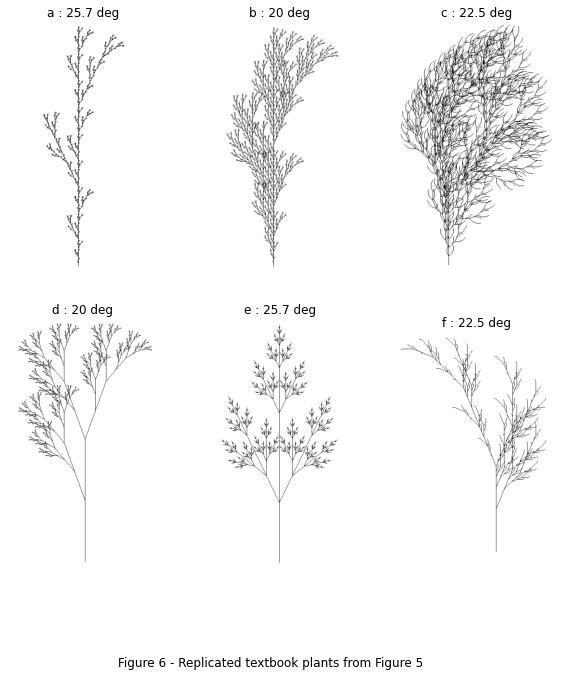

In [16]:
grid_img('fig *.png', 'Figure 6 - Replicated textbook plants from Figure 5')
HTML("""
    <style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: top;
    }
    </style>
    """)

The image produced is identical to the textbook's only differing in line width.

### Modifying the Angle of the branches 

Next up, we will demonstrate the effect of stochastically modifying the drawing angle. Originally the angle stays constant which creates self repeating patterns that mimic vegetation. A naive way to create plants that look similar is to modify their drawing angles based on which branch we are on. This is determined by the number of open brackets that the drawing tool finds itself in, and we call it the degree of branching, $b$.

The degree of branching for the deviation in the angle is determined when drawing each straight line by counting how many open brackets appear before the character in the string.

For example, when drawing '+' in the string ' F[+F]F ': $b = 1$.

When drawing '+' in the string ' F[F[+]F-] ', $b = 2$ but for the '-' character, $b = 1$.

The idea behind this is to increase the randomness more intensely deeper in the sub-branches to ensure that the general structure of the plant appears similar to the original structure, but the finer details looks more random. To do this, we use a normally distributed angle around the original with increasing standard deviation depending on the degree of branching. The standard deviation is calculated by:

$$\text{std} = a \times (1-e^{-b})$$

where $b$ is the degree of branching (before any brackets, $b=0$) and $a$ is a positive stochasticity constant. $a = 0$ represents no stochasticity and thus the original image. Using this method, the standard deviation increases substantially per degree of branching. 

Below is an example of the same plants from Fig. 5, using $a=10$, to demonstrate the effect outlined. All other variables remain the same.

In [ ]:
# Stochastically altering the angle

# Stochasticity Constant
a = 10

# Figures a - c have the same axiom and variables
A = 'F' # Axiom
V = ['F'] # Variables subject to rules
rules = [{'F': [['F[+F]F[-F]F', 1.]]}, \
         {'F': [['F[+F]F[-F][F]', 1.]]}, \
         {'F': [['FF-[-F+F+F]+[+F-F-F]', 1.]]} ] # Rule set with probabilities
angles = [25.7, 20, 22.5] # Branching angles

fig_plants(A, V, rules, angles, a, stoch='angle')
    
# Figures d - f have the same axiom and variables
A = 'X' # Axiom
V = ['F', 'X'] # Variables subject to rules
rules = [{'F': [['FF', 1.]], \
          'X': [['F[+X]F[-X]+X', 1.]]}, \
         
         {'F': [['FF', 1.]], \
          'X': [['F[+X][-X]FX', 1.]]}, \
         
         {'F': [['FF', 1.]], \
          'X': [['F-[[X]+X]+F[+FX]-X', 1.]]} ] # Rule set with probabilities
angles = [20, 25.7, 22.5] # Branching angle 

fig_plants(A, V, rules, angles, a, stoch='angle')

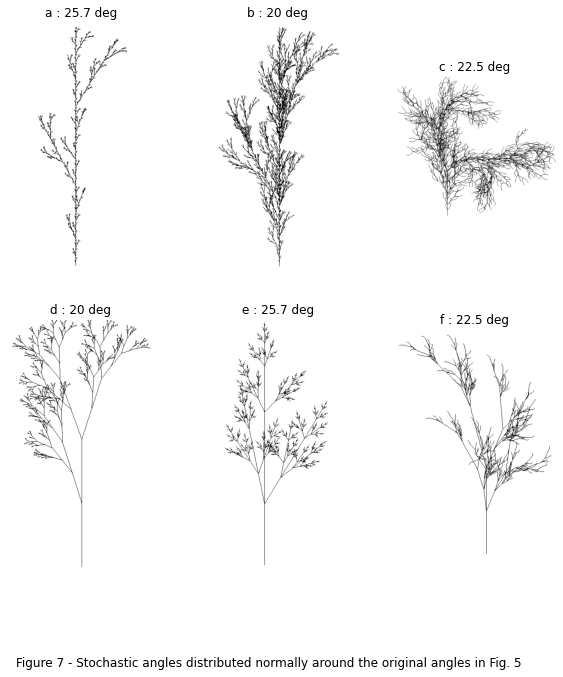

In [17]:
grid_img('stoch ang fig *.png', 'Figure 7 - Stochastic angles distributed normally around the original angles in Fig. 5')
HTML("""
    <style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: top;
    }
    </style>
    """)

As we can see, this generates an interesting alternative to the original rules, which is less geometrically consistent and often more realistic. We find a stochastic constant of $a=4$ to $a=10$ yields good results for simulating plants.

### Stochastically Altering the Rules

A more realistic way to simulate plants is by stochastically altering the rules governing the growth of the plant, often explained by exterior environmental factors. We are able to do this by providing several possible rules with different probabilities.

Instead of setting constant probabilities associated to each possible rule, we thought it would be more realistic that each sub-branching would have increasing probabilities to deviate from the original rule. Thus, it would be based on the degree of branching (DOB), similar to as before. The degree of branching can range from 0 (the initial branch) to $\text{DOB}_{\text{max}}$. $\text{DOB}_{\text{max}}$ is determined based on the number of growth iterations, $N$, and the maximum number of open brackets that any single character might be in, $b_{\text{max}}$. $b_{\text{max}}$ is chosen based on which rule has the most open brackets before a self-repeating variable is reached.

$$\text{DOB}_{\text{max}} = b_{\text{max}} \times N$$

In our case of the simple plants, we alter our rules such that each variable now has multiple possible outcomes with their associated maximum probabilities. There is some constraints on the program, as the probabilities must sum to 1, but the distribution of the probabilities can vary amongst the possible rules. 

The first rule given for each variable is assumed to be the original rule, and when DOB = 0, the probability of the first rule is 1, with zero probability for all other rules. At $\text{DOB}_{\text{max}}$, the probability distribution is given by that specified in the set of rules, i.e. each rule has their maximum probabilities. 

Between $DOB=0$ and $DOB_{\text{max}}$, the distribution gradually shifts using numpy linspace, ensuring the total probability is always exactly 1. 

As an analytic example, we can take the following table as a possible set of rules:
<table>
    <caption style="caption-side:bottom">Table 2: Possible Rules for Variable F</caption>
    <tr>
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">Variable</th>
        <th scope="col" style="text-align: left;">Rules</th>
        <th scope="col" style="text-align: left;">Probabilities</th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;"> F </th>
        <th scope="col" style="text-align: left;"> F[+F]F[-F]F </th>
        <th scope="col" style="text-align: left;"> 0.5</th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;"> F </th>
        <th scope="col" style="text-align: left;"> F[+F][-F]F </th>
        <th scope="col" style="text-align: left;"> 0.3 </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;"> F </th>
        <th scope="col" style="text-align: left;"> F[+F-F]F[-F+F] </th>
        <th scope="col" style="text-align: left;"> 0.2 </th>
    </tr>
</table>

If we use 5 growth iterations, then $\text{DOB}_{\text{max}} = 5$ as there is only one open bracket for the variable F in each of the rules. The probability table for the above example is then: 

<table>
    <caption style="caption-side:bottom">Table 2: Possible Rules for Variable F</caption>
    <tr>
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">DOB Level</th>
        <th scope="col" style="text-align: left;">Rule 1 Probability </th>
        <th scope="col" style="text-align: left;">Rule 2 Probability </th>
        <th scope="col" style="text-align: left;">Rule 3 Probability </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">1</th>
        <th scope="col" style="text-align: left;"> 1.0 </th>
        <th scope="col" style="text-align: left;"> 0.0 </th>
        <th scope="col" style="text-align: left;"> 0.0 </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">2</th>
        <th scope="col" style="text-align: left;"> 0.875 </th>
        <th scope="col" style="text-align: left;"> 0.075 </th>
        <th scope="col" style="text-align: left;"> 0.05 </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">3</th>
        <th scope="col" style="text-align: left;"> 0.75 </th>
        <th scope="col" style="text-align: left;"> 0.15 </th>
        <th scope="col" style="text-align: left;"> 0.10 </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">4</th>
        <th scope="col" style="text-align: left;"> 0.625 </th>
        <th scope="col" style="text-align: left;"> 0.225 </th>
        <th scope="col" style="text-align: left;"> 0.15 </th>
    </tr>
    <tr style="background:#E8FFE7;">
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">5</th>
        <th scope="col" style="text-align: left;"> 0.50 </th>
        <th scope="col" style="text-align: left;"> 0.30 </th>
        <th scope="col" style="text-align: left;"> 0.20 </th>
    </tr>
</table>

As there are an infinite number of rules that a variable can obey, we choose to focus on simpler examples to demonstrate the power of our code. The code can easily be adapted to include a function that creates rules for each variable, thus developing even more randomly generated plants. 

In the following code, we apply the above modified rules to plants found in Figure 5. For the plants with multiple variables, the same can be done, just simply creating new rules for the new variables.

In [17]:
# Stochastically altering the rules

# Stochasticity Constant - none here
a = 0

# Figures a - c have the same axiom and variables
A = 'F' # Axiom
V = ['F'] # Variables subject to rules
rules = [{'F': [['F[+F]F[-F]F', 0.5],\
                ['F[+F][-F]F', 0.3], \
                ['F[+F-F]F[-F+F]', 0.2]]}, \
         
         {'F': [['F[+F]F[-F][F]', 0.5],\
                ['F[+F][-F]F', 0.3], \
                ['F[+F-F]F[-F+F]', 0.2]]}, \
         
         {'F': [['FF-[-F+F+F]+[+F-F-F]', 0.5],\
                ['F[+F][-F]F', 0.3], \
                ['F[+F-F]F[-F+F]', 0.2]]} ] # Rule set with probabilities
angles = [25.7, 20, 22.5] # Branching angles

fig_plants(A, V, rules, angles, a, stoch='rules')

# Figures d - f have the same axiom and variables
A = 'X' # Axiom
V = ['F', 'X'] # Variables subject to rules
rules = [{'F': [['FF', 0.5], \
                ['F[X]', 0.5]], \
          'X': [['F[+X]F[-X]+X', 0.5], \
                ['F[+FX]-X', 0.5]]}, \
         
         {'F': [['FF', 0.5], \
                ['F[X]', 0.5]], \
          'X': [['F[+X][-X]FX', 0.5], \
                ['F[+FX]-X', 0.5]]}, \
         
         {'F': [['FF', 0.5], \
                ['F[X]', 0.5]], \
          'X': [['F-[[X]+X]+F[+FX]-X', 0.5], \
                ['F[+FX]-X', 0.5]]} ] # Rule set with probabilities
angles = [20, 25.7, 22.5] # Branching angle 

fig_plants(A, V, rules, angles, a, stoch='rules')

Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!
Fractal Initiated!
Done growing!


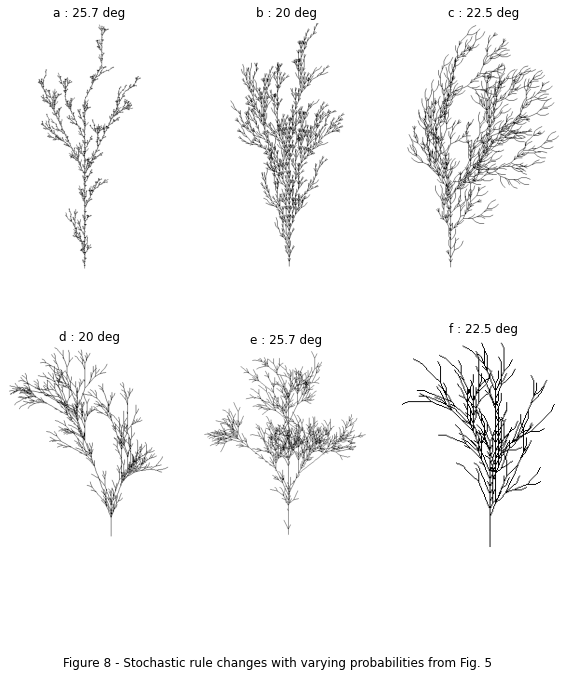

In [19]:
grid_img('stoch rule fig*.png', 'Figure 8 - Stochastic rule changes with varying probabilities from Fig. 5')
HTML("""
    <style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: top;
    }
    </style>
    """)

Figure 8 shows an example of possible configurations from stochastically changing the rules. They significantly differ from the initial versions shown in Figure 5, but they look more realistic! The additional rules and probabilities were created based on intuition, but they can be changed to represent a multitude of factors that affect a plant's growth. 

Now, we can combine both stochastic processes to see what happens!

In [13]:
# Combined Stochasticity 

# Stochasticity Constant
a = 10

# Figures a - c have the same axiom and variables
A = 'F' # Axiom
V = ['F'] # Variables subject to rules
rules = [{'F': [['F[+F]F[-F]F', 0.5],\
                ['F[+F][-F]F', 0.3], \
                ['F[+F-F]F[-F+F]', 0.2]]}, \
         
         {'F': [['F[+F]F[-F][F]', 0.5],\
                ['F[+F][-F]F', 0.3], \
                ['F[+F-F]F[-F+F]', 0.2]]}, \
         
         {'F': [['FF-[-F+F+F]+[+F-F-F]', 0.5],\
                ['F[+F][-F]F', 0.3], \
                ['F[+F-F]F[-F+F]', 0.2]]} ] # Rule set with probabilities
angles = [25.7, 20, 22.5] # Branching angles

fig_plants(A, V, rules, angles, a, stoch='rules')

# Figures d - f have the same axiom and variables
A = 'X' # Axiom
V = ['F', 'X'] # Variables subject to rules
rules = [{'F': [['FF', 0.75], \
                ['F[X]', 0.25]], \
          'X': [['F[+X]F[-X]+X', 0.75], \
                ['F[+FX]-X', 0.25]]}, \
         
         {'F': [['FF', 0.75], \
                ['F[X]', 0.25]], \
          'X': [['F[+X][-X]FX', 0.75], \
                ['F[+FX]-X', 0.25]]}, \
         
         {'F': [['FF', 0.75], \
                ['F[X]', 0.25]], \
          'X': [['F-[[X]+X]+F[+FX]-X', 0.75], \
                ['F[+FX]-X', 0.25]]} ] # Rule set with probabilities
angles = [20, 25.7, 22.5] # Branching angle 

fig_plants(A, V, rules, angles, a, stoch='rules')

TypeError: list indices must be integers or slices, not tuple

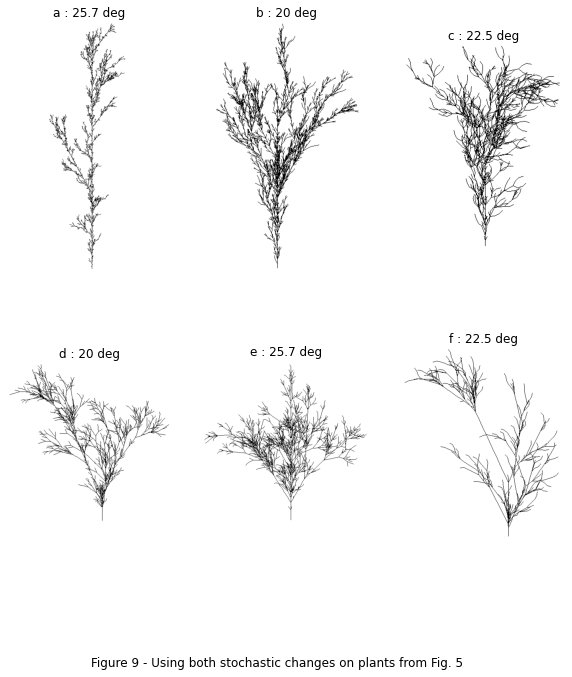

In [20]:
grid_img('stoch both fig *.png', 'Figure 9 - Example using both stochastic changes on plants from Fig. 5')
HTML("""
    <style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: top;
    }
    </style>
    """)

### Remarks on the addition of stochastic processess
We can see that this produces even more unique plants, as the two stochastic processes combined ensure that each plant is impossible to replicate. These would be invaluable for video games or movie graphics, when a large number of plants of the same 'type' are needed. While only using the turtle package and drawing 2D images for our project, the speed of developing random plants that look similar and realistic is still very fast. This is necessary in procedural generation, especially in 3D scenarios and as such, the combined stochastic processes provides a solution for the procedural generation of self replicating objects.